# Define the parameters

In [1]:
using DrWatson
@quickactivate :FlowComplexity
# using .FlowComplexity
# include(srcdir("Simulation.jl"))

# parameters of the simulation
mass = 1000
graph_type = "line"
N_reactors = 1
forward_rate = 1.0e-2   # f_rate_list = [0.005, 0.01, 0.05, 0.1, 0.5, 1.0]
outflow_rate = 5.0      # o_rate_list = [5.0, 10.0, 50.0, 100.0]
total_time = 1.0
sim_number = 2
save_time_series = true
save_parameters = true
save_graph = false
save_simulation = true
save_directory = "MS-dummy/sub_task"
notes = "First milestone: time series"

# instantiate
sim = Simulation(mass, graph_type, N_reactors, forward_rate, outflow_rate, 
                total_time = total_time, 
                sim_number = sim_number, 
                save_time_series = save_time_series, save_parameters = save_parameters, save_graph = save_graph, save_simulation = save_simulation,
                save_directory = save_directory,
                notes = notes)


Simulation(1.0, 1.0, -1, 4733314, "line", 1, 1, 1000, [1.0e-5 1.0 5.0], Dict(-1 => (-1,)), [:complete_timeseries], Dict{Any, Any}(), 2, true, true, false, true, "/Users/alexandre/Documents/academic/2-research/projects/2023 spatial-topology/flow-complexity/data/sims/MS-dummy/sub_task/000002", "First milestone: time series", FlowComplexity.Ensemble([1], FlowComplexity.Chemostat[FlowComplexity.Chemostat(1, [0.01, 1.0, 5.0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 1000, 1000, Int64[], Float64[], Int64[])], Graphs.SimpleGraphs.SimpleDiGraph{Int64}(0, [Int64[]], [Int64[]]), [1]))

# Run the simulation

In [2]:
# run
RunSimulation(sim) # takes about 2m22sec

Sim Completed
Data Saved


# TODO: Read the time series and format the data

In [4]:
using CSV
using DataFrames

save_directory = "MS-dummy/sub_task"
sim_number_string = "000002"
fn = datadir("sims", save_directory, sim_number_string) * "/timeseries.csv"

# fn = "/Users/alexandre/Documents/academic/2-research/projects/2023 spatial-topology/flow-complexity/data/sims/1/timeseries.csv"

df = CSV.read(fn, DataFrame)
sort!(df, :time);

# Plot the data

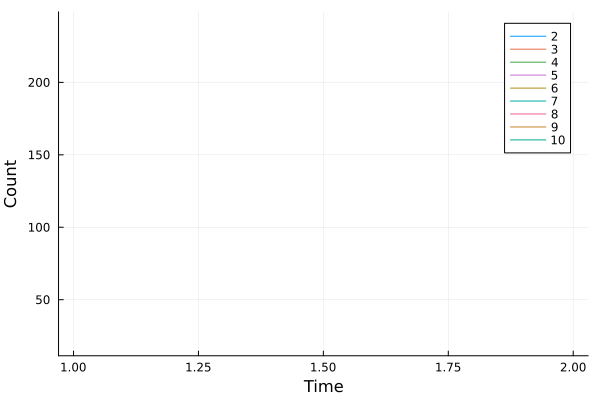

In [5]:
using Plots

p = plot(xlabel="Time", ylabel="Count")

for i in 2:10

    filtered_df = filter(row -> row[:variable] == i, df)
    plot!(p, filtered_df.time, filtered_df.value, label="$i")

end

display(p)